In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

pd.set_option("display.max_colwidth", 100)
pd.set_option("display.max_columns", 200)

In [67]:
# jupyterの幅を自動調整
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [4]:
train = pd.read_csv('01.data/train.csv')

In [10]:
# 行数とカラム数をカウント
rows = train.shape[0]
columns = train.shape[1]
print("The train dataset contains {0} rows and {1} columns".format(rows, columns))

The train dataset contains 114321 rows and 133 columns


In [49]:
train.describe()

,ID,target,v1,v2,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v23,v25,v26,v27,v28,v29,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v48,v49,v50,v51,v53,v54,v55,v57,v58,v59,v60,v61,v62,v63,v64,v65,v67,v68,v69,v70,v72,v73,v76,v77,v78,v80,v81,v82,v83,v84,v85,v86,v87,v88,v89,v90,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v108,v109,v111,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
count,114321.000000,114321.000000,6.448900e+04,6.452500e+04,6.452500e+04,6.569700e+04,6.448900e+04,6.448900e+04,6.570200e+04,6.447000e+04,1.142370e+05,6.448500e+04,1.142350e+05,6.448900e+04,1.143170e+05,6.448500e+04,6.442600e+04,6.452500e+04,6.448900e+04,6.447800e+04,64481.000000,113710.000000,6.364600e+04,65702.000000,6.448900e+04,6.448900e+04,6.448900e+04,6.448900e+04,6.448900e+04,6.448900e+04,1.142100e+05,6.448900e+04,6.569700e+04,6.447800e+04,114321.000000,6.448500e+04,1.142100e+05,6.448900e+04,6.448900e+04,6.448500e+04,6.452500e+04,6.448900e+04,65702.000000,6.452500e+04,6.448900e+04,1.142350e+05,6.364300e+04,6.448500e+04,65702.000000,6.448900e+04,6.448900e+04,6.448500e+04,6.452500e+04,6.448900e+04,6.452500e+04,114321.000000,65702.000000,6.452500e+04,64481.000000,6.448900e+04,64485.000000,6.442600e+04,65685.000000,114321.000000,6.448500e+04,6.452500e+04,6.448900e+04,6.442600e+04,6.447000e+04,6.569700e+04,6.569700e+04,6.448900e+04,6.448900e+04,6.363900e+04,6.448900e+04,65658.000000,6.448900e+04,65702.000000,6.448500e+04,6.447800e+04,6.448900e+04,6.448900e+04,6.447800e+04,6.448900e+04,6.447800e+04,6.566700e+04,6.448900e+04,6.448500e+04,6.452500e+04,6.300500e+04,6.448900e+04,6.448900e+04,65663.000000,6.452500e+04,6.569700e+04,6.569700e+04,6.448900e+04,1.142910e+05,6.442600e+04,6.448500e+04,6.569700e+04,6.447800e+04,6.364100e+04,6.448500e+04,6.448100e+04,6.447000e+04,63643.000000,6.570200e+04,6.448900e+04,6.448900e+04,6.569700e+04,114321.000000,6.447800e+04,6.442600e+04
mean,114228.928228,0.761199,1.630686e+00,7.464411e+00,4.145098e+00,8.742359e+00,2.436402e+00,2.483921e+00,1.496569e+00,9.031859e+00,1.883046e+00,1.544741e+01,6.881304e+00,3.798396e+00,1.209428e+01,2.080911e+00,4.923222e+00,3.832270e+00,8.410455e-01,2.223005e-01,17.773592,7.029740,1.093088e+00,1.698129,1.876031e+00,2.743454e+00,5.093328e+00,8.206416e+00,1.622151e+00,2.161633e+00,6.406236e+00,8.122387e+00,1.337560e+01,7.414708e-01,0.090928,1.237184e+00,1.046593e+01,7.182551e+00,1.292497e+01,2.216597e+00,1.079517e+01,9.142231e+00,1.630525,1.253802e+01,8.016547e+00,1.504265e+00,7.198159e+00,1.571130e+01,1.253856,1.559556e+00,4.077828e+00,7.701653e+00,1.058794e+01,1.714294e+00,1.458303e+01,1.030694,1.687327,6.343713e+00,15.847557,9.287275e+00,17.564117,9.449335e+00,12.269960,1.431767,2.433303e+00,2.405056e+00,7.307366e+00,1.333448e+01,2.209700e+00,7.287174e+00,6.208356e+00,2.173808e+00,1.607956e+00,2.822253e+00,1.220184e+00,10.180216,1.924184e+00,1.518425,9.669126e-01,5.823668e-01,5.475185e+00,3.852883e+00,6.657576e-01,6.457952e+00,7.622554e+00,7.667624e+00,1.250721e+00,1.209162e+01,6.866414e+00,2.890289e+00,5.296716e+00,2.642828e+00,1.081045,1.179136e+01,2.152620e+00,4.181284e+00,3.365314e+00,1.357445e+01,1.054805e+01,2.291218e+00,8.303857e+00,8.364651e+00,3.168970e+00,1.291218e+00,2.737596e+00,6.822439e+00,3.549938,9.198120e-01,1.672658e+00,3.239542e+00,2.030373e+00,0.310144,1.925763e+00,1.739389e+00
std,65934.487362,0.426353,1.082813e+00,2.961676e+00,1.148263e+00,2.036018e+00,5.999653e-01,5.894485e-01,2.783003e+00,1.930262e+00,1.393979e+00,7.900790e-01,9.244945e-01,1.175892e+00,1.443947e+00,7.329166e-01,1.791187e+00,1.911504e+00,6.162762e-01,1.713459e-01,1.155002,1.072271,4.003695e+00,2.956854,5.511957e-01,8.343556e-01,2.677940e+00,1.285432e+00,5.635237e-01,9.848598e-01,2.025179e+00,1.339802e+00,2.355631e+00,5.413723e-01,0.583478,2.358155e+00,3.169183e+00,1.004472e+00,9.969760e-01,6.479912e-01,2.110887e+00,2.064508e+00,2.895831,2.196164e+00,9.026805e-01,1.168329e+00,2.510385e+00,7.993680e-01,2.

In [51]:
train.head(10)

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50,v51,v52,v53,v54,v55,v56,v57,v58,v59,v60,v61,v62,v63,v64,v65,v66,v67,v68,v69,v70,v71,v72,v73,v74,v75,v76,v77,v78,v79,v80,v81,v82,v83,v84,v85,v86,v87,v88,v89,v90,v91,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v107,v108,v109,v110,v111,v112,v113,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,0.503281,16.434108,6.085711,2.866830,11.636387,1.355013,8.571429,3.670350,0.106720,0.148883,18.869283,7.730923,XDX,-1.716131e-08,C,0.139412,1.720818,3.393503,0.590122,8.880867,C,A,1.083033,1.010829,7.270147,8.375452,11.326592,0.454546,0,4.012088,7.711453,7.653429,12.707581,2.015505,10.498338,9.848672,0.113561,C,12.171733,8.086643,0.899420,7.277792,G,16.747968,0.037096,1.299638,DI,3.971118,0.529802,10.890984,1.588448,15.858152,1,0.153461,6.363189,18.303925,C,9.314079,15.231789,17.142857,11.784549,F,1,1.614988,B,D,2.230940,7.292418,8.571429,E,3.000000,7.528326,8.861647,0.649820,1.299638,1.707317,0.866426,9.551836,3.321300,0.095678,0.905342,A,0.442252,5.814018,3.517720,0.462019,7.436824,5.454545,8.877414,1.191337,19.470199,8.389237,2.757375,4.374296,1.574039,0.007294,12.579184,E,2.382692,3.930922,B,0.433213,O,NaN,15.634907,2.857144,1.951220,6.592012,5.909091,-6.297423e-07,1.059603,0.803572,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,NaN,1.312910,NaN,6.507647,NaN,11.636386,NaN,NaN,NaN,NaN,NaN,NaN,6.763110,GUV,NaN,C,3.056144,NaN,NaN,NaN,NaN,C,A,NaN,NaN,3.615077,NaN,14.579479,NaN,0,NaN,14.305766,NaN,NaN,NaN,NaN,NaN,2.449959,E,NaN,NaN,1.379210,NaN,G,NaN,1.129469,NaN,DY,NaN,NaN,NaN,NaN,NaN,2,2.544736,NaN,NaN,A,NaN,NaN,NaN,12.053353,F,2,NaN,B,D,NaN,NaN,NaN,D,NaN,7.277655,3.430691,NaN,NaN,NaN,NaN,9.848004,NaN,2.678584,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,8.303967,NaN,NaN,NaN,NaN,NaN,NaN,1.505335,NaN,B,1.825361,4.247858,A,NaN,U,G,10.308044,NaN,NaN,10.595357,NaN,NaN,NaN,NaN,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,0.765864,14.756098,6.384670,2.505589,9.603542,1.984127,5.882353,3.170847,0.244541,0.144258,17.952332,5.245035,FQ,-2.785053e-07,E,0.113997,2.244897,5.306122,0.836005,7.499999,NaN,A,1.454082,1.734693,4.043864,7.959184,12.730517,0.259740,0,7.378964,13.077201,6.173469,12.346939,2.926830,8.897561,5.343819,0.126035,C,12.711328,6.836734,0.604504,9.637627,F,15.102041,0.085573,0.765305,AS,4.030613,4.277456,9.105481,2.151361,16.075602,1,0.123643,5.517949,16.377205,A,8.367347,11.040463,5.882353,8.460654,B,3,2.413618,B,B,1.963971,5.918368,11.764705,E,3.333334,10.194433,8.266200,1.530611,1.530613,2.429906,1.071429,8.447465,3.367346,0.111388,0.811447,G,0.271480,5.156559,4.214944,0.309657,5.663265,5.974026,11.588858,0.841837,15.491329,5.879353,3.292788,5.924457,1.668401,0.008275,11.670572,C,1.375753,1.184211,B,3.367348,S,NaN,11.205561,12.941177,3.129253,3.478911,6.233767,-2.792745e-07,2.138728,2.238806,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,6.542669,16.347483,9.646653,3.903302,14.094723,1.945044,5.517242,3.610789,1.224114,0.231630,18.376407,7.517125,ACUE,-4.805344e-07,D,0.148843,1.308269,2.303640,8.926662,8.874521,C,B,1.587644,1.666667,8.703550,8.898468,11.302795,0.433735,0,0.287322,11.523045,7.931035,12.935823,1.470878,12.708574,9.670823,0.108387,C,12.194855,8.591954,3.329176,4.780357,H,16.621695,0.139721,1.178161,BW,3.965517,1.732102,11.777912,1.229246,15.927390,1,0.140260,6.292979,17.011645,A,9.703065,18.568129,9.425288,13.594728,F,2,2.272541,B,D,2.188198,8.213602,13.448277,B,1.947261,4.797873,13.315819,1.681034,1.379310,1.587045,1.242817,10.

# Null可視化

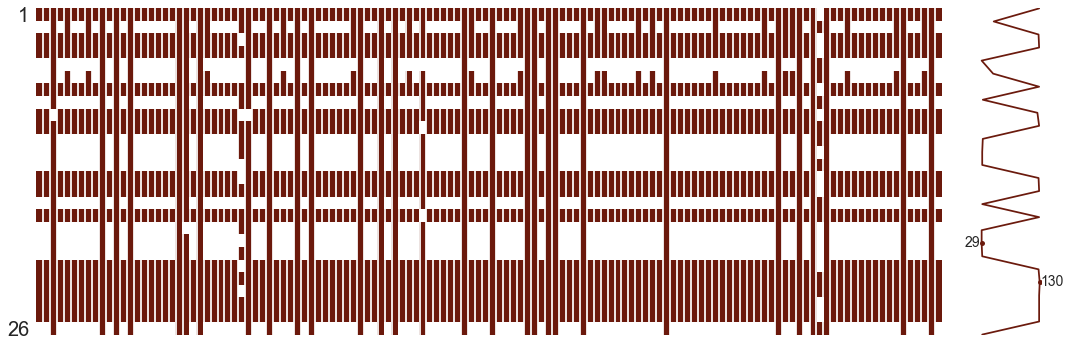

In [31]:
msno.matrix(df=train.iloc[0:26,2:132], figsize=(18, 6), color=(0.42, 0.1, 0.05))

# 変数間の相関を可視化

In [61]:
# 目的変数と数字型の変数を指定
var_num = ['target',	'v1',	'v2',	'v4',	'v5',	'v6',	'v7',	'v8',	'v9',	'v10',	'v11',	'v12',	'v13',	'v14',	'v15',	'v16',	'v17',
           'v18',	'v19',	'v20',	'v21',	'v23',	'v25',	'v26',	'v27',	'v28',	'v29',	'v32',	'v33',	'v34',	'v35',	'v36',	'v37',	'v38',	'v39',
           'v40',	'v41',	'v42',	'v43',	'v44',	'v45',	'v46',	'v48',	'v49',	'v50',	'v51',	'v53',	'v54',	'v55',	'v57',	'v58',	'v59',	'v60',	
           'v61',	'v62',	'v63',	'v64',	'v65',	'v67',	'v68',	'v69',	'v70',	'v72',	'v73',	'v76',	'v77',	'v78',	'v80',	'v81',	'v82',	'v83',	
           'v84',	'v85',	'v86',	'v87',	'v88',	'v89',	'v90',	'v92',	'v93',	'v94',	'v95',	'v96',	'v97',	'v98',	'v99',	'v100',	'v101',	'v102',	
           'v103',	'v104',	'v105',	'v106',	'v108',	'v109',	'v111',	'v114',	'v115',	'v116',	'v117',	'v118',	'v119',	'v120',	'v121',	'v122',	
           'v123',	'v124',	'v126',	'v127',	'v128',	'v129',	'v130',	'v131']

In [60]:
sns.set(style="white")
# Compute the correlation matrix
corr = train[var_num].corr()

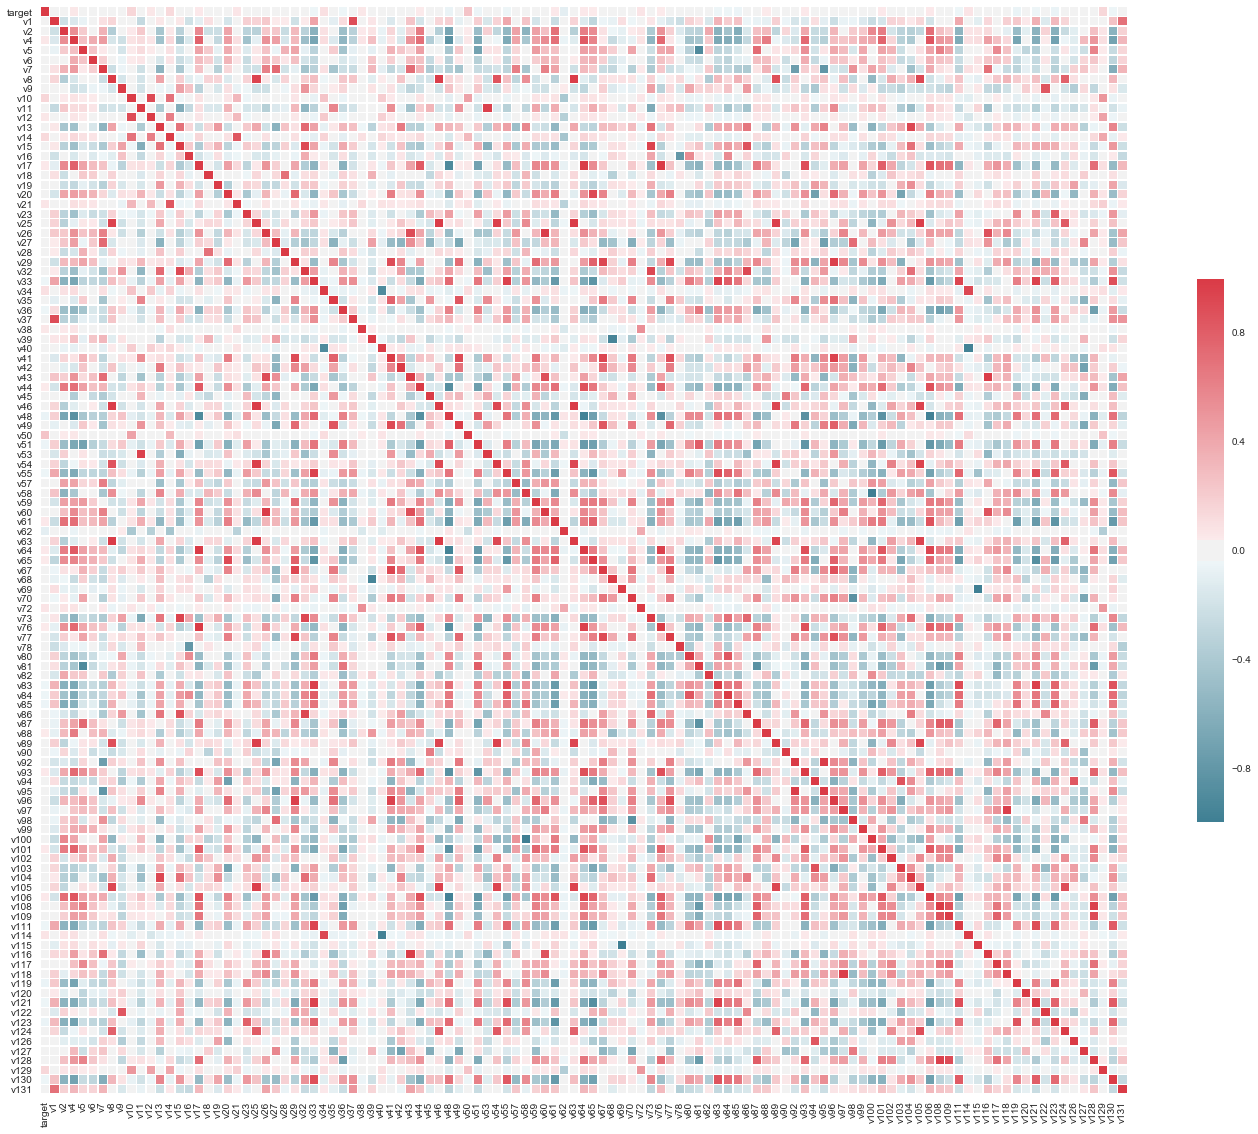

In [62]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 20))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

In [45]:
var_num = ['ID', 'target']